<a href="https://colab.research.google.com/github/ArSin2002/data_sciences/blob/main/data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [21]:
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='C:/Users/Aryan Sinha/Desktop/My Stuff/Data Science/Deep Learning/flower_photos',untar=True)

In [22]:
data_dir

'/tmp/.keras/datasets/flower_photos'

In [24]:
# data_dir=r'C:\Users\Aryan Sinha\Desktop\My Stuff\Data Science\Deep Learning\datasets\flower_photos'
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/tmp/.keras/datasets/flower_photos')

In [26]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [27]:
roses=list(data_dir.glob('roses/*.jpg'))
roses[:5]

[PosixPath('/tmp/.keras/datasets/flower_photos/roses/5717319579_190e85c7d1_m.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/2535466393_6556afeb2f_m.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/1402130395_0b89d76029.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/15820572326_be2ea4a55c_n.jpg')]

In [37]:
tulips=list(data_dir.glob('tulips/*.jpg'))
tulips[:5]

[PosixPath('/tmp/.keras/datasets/flower_photos/tulips/176458518_f81d4bff8e.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/tulips/4521037085_70d5802e1d_m.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/tulips/8572847041_d0cc07861f_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/tulips/13472387874_d844478dbb.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/tulips/16732302779_8aa56f255d_n.jpg')]

In [28]:
import PIL


In [29]:
import cv2

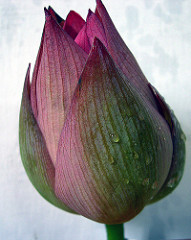

In [31]:
PIL.Image.open(roses[1])

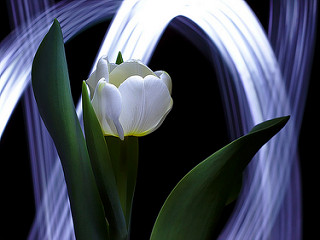

In [39]:
PIL.Image.open(tulips[2])

In [40]:
flower_images_dict={
    'roses':list(data_dir.glob('roses/*.jpg')),
    'daisy':list(data_dir.glob('daisy/*.jpg')),
    'dandelion':list(data_dir.glob('dandelion/*.jpg')),
    'sunflowers':list(data_dir.glob('sunflowers/*.jpg')),
    'tulips':list(data_dir.glob('tulips/*.jpg')),
}

In [41]:
for flower in flower_images_dict:
    print(len(flower_images_dict[flower]))

641
633
898
699
799


In [42]:
flowers_label_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}

In [43]:
str(flower_images_dict['roses'][0])

'/tmp/.keras/datasets/flower_photos/roses/5717319579_190e85c7d1_m.jpg'

array([[[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       ...,

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [3, 3, 3],
        [0, 0, 0],
        [0, 0, 0]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [0, 0, 0],
        [4, 4, 4],
        [0, 0, 0]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [4, 4, 4],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
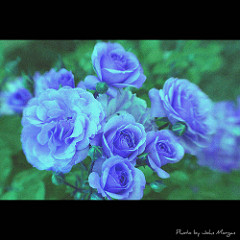

In [50]:
img = cv2.imread(str(flower_images_dict['roses'][0]))
img

In [46]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [48]:
x=[]
y=[]

for flower_name , images in flower_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flowers_label_dict[flower_name])

array([[[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       ...,

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [3, 3, 3],
        [1, 1, 1],
        [2, 2, 2]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [2, 2, 2],
        [0, 0, 0]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [3, 3, 3],
        [2, 2, 2],
        [0, 0, 0]]], dtype=uint8)
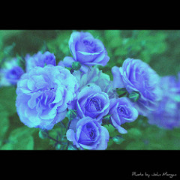

In [49]:
x[0]

In [51]:
y[0]

0

In [52]:
import numpy as np

In [53]:
x=np.array(x)
y=np.array(y)

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)


In [55]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [56]:
x_train_scaled[0]

array([[[0.12941176, 0.43921569, 0.33333333],
        [0.12156863, 0.43137255, 0.3254902 ],
        [0.11764706, 0.42352941, 0.32941176],
        ...,
        [0.10196078, 0.41176471, 0.28235294],
        [0.09411765, 0.40784314, 0.27058824],
        [0.09019608, 0.40784314, 0.27058824]],

       [[0.13333333, 0.44313725, 0.3372549 ],
        [0.12941176, 0.43921569, 0.33333333],
        [0.1254902 , 0.43529412, 0.32941176],
        ...,
        [0.09803922, 0.40784314, 0.2745098 ],
        [0.09019608, 0.40392157, 0.26666667],
        [0.09019608, 0.40392157, 0.26666667]],

       [[0.13333333, 0.43921569, 0.33333333],
        [0.12941176, 0.43529412, 0.32941176],
        [0.12156863, 0.43137255, 0.32156863],
        ...,
        [0.09411765, 0.40392157, 0.2745098 ],
        [0.09019608, 0.40392157, 0.26666667],
        [0.09019608, 0.40392157, 0.26666667]],

       ...,

       [[0.09411765, 0.38431373, 0.2745098 ],
        [0.09019608, 0.38823529, 0.2745098 ],
        [0.09019608, 0

In [61]:
model = Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(5,activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [62]:
model.fit(x_train_scaled,y_train,epochs=30)

Epoch 1/30
86/86 [==============================] - 8s 20ms/step - loss: 1.4039 - accuracy: 0.3870
Epoch 2/30
86/86 [==============================] - 2s 23ms/step - loss: 1.0470 - accuracy: 0.5810
Epoch 3/30
86/86 [==============================] - 2s 22ms/step - loss: 0.8654 - accuracy: 0.6610
Epoch 4/30
86/86 [==============================] - 2s 20ms/step - loss: 0.6805 - accuracy: 0.7464
Epoch 5/30
86/86 [==============================] - 2s 21ms/step - loss: 0.4641 - accuracy: 0.8296
Epoch 6/30
86/86 [==============================] - 2s 21ms/step - loss: 0.2793 - accuracy: 0.9015
Epoch 7/30
86/86 [==============================] - 2s 20ms/step - loss: 0.1935 - accuracy: 0.9360
Epoch 8/30
86/86 [==============================] - 2s 21ms/step - loss: 0.1028 - accuracy: 0.9706
Epoch 9/30
86/86 [==============================] - 2s 23ms/step - loss: 0.0456 - accuracy: 0.9887
Epoch 10/30
86/86 [==============================] - 2s 22ms/step - loss: 0.0369 - accuracy: 0.9906
Epoch 11/

In [70]:
model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 1s 13ms/step - loss: 3.2861 - accuracy: 0.6253


[3.2860805988311768, 0.6252723336219788]

In [65]:
y_pred=model.predict(x_test_scaled)

29/29 [==============================] - 1s 19ms/step


In [66]:
y_pred[:5]

array([[3.3608362e-13, 8.3931357e-16, 2.7015895e-13, 1.0000000e+00,
        6.2181493e-12],
       [1.0989459e-05, 1.9299327e-03, 9.9804997e-01, 2.2290781e-06,
        6.9499079e-06],
       [1.5577164e-06, 9.7878772e-01, 3.4870616e-06, 2.1207130e-02,
        1.2717415e-07],
       [1.4961295e-06, 1.8274234e-06, 8.1099773e-07, 9.9948609e-01,
        5.0965836e-04],
       [3.5488517e-07, 1.8398616e-05, 9.9996889e-01, 3.9907185e-08,
        1.2445815e-05]], dtype=float32)

In [76]:
y_predicted=[]
for e in y_pred:
    y_predicted.append(np.argmax(e))
y_predicted[20:30]

[2, 2, 1, 3, 3, 0, 3, 3, 3, 2]

In [75]:
y_test[20:30]

array([2, 2, 4, 2, 4, 0, 3, 4, 3, 4])

In [89]:
data_augmentation=Sequential([
    layers.RandomZoom(0.1),
    layers.RandomRotation(0.1),
    layers.RandomFlip(
        "horizontal"
    )
])

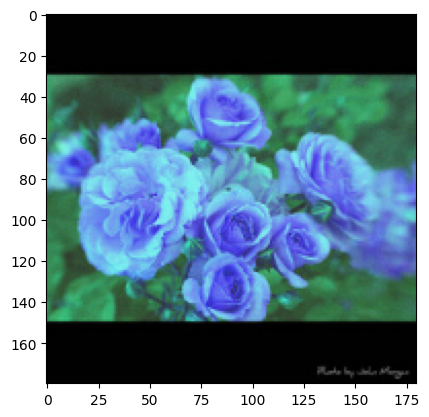

In [82]:
plt.imshow(x[0])

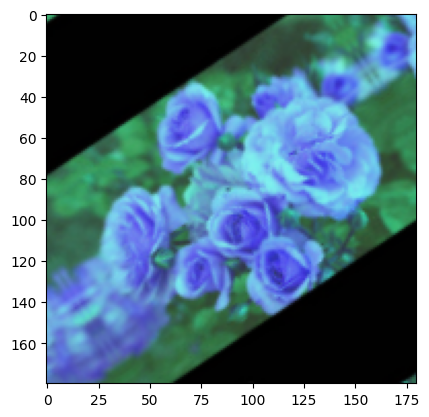

In [87]:
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))

In [90]:
num_classes=5

model=Sequential([
    data_augmentation,
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(5,activation='softmax')
])

In [92]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [93]:
model.fit(x_train_scaled,y_train,epochs=30)

Epoch 1/30
86/86 [==============================] - 6s 32ms/step - loss: 1.3087 - accuracy: 0.4306
Epoch 2/30
86/86 [==============================] - 2s 28ms/step - loss: 1.0526 - accuracy: 0.5705
Epoch 3/30
86/86 [==============================] - 2s 28ms/step - loss: 0.9809 - accuracy: 0.6217
Epoch 4/30
86/86 [==============================] - 2s 28ms/step - loss: 0.8692 - accuracy: 0.6635
Epoch 5/30
86/86 [==============================] - 2s 29ms/step - loss: 0.8333 - accuracy: 0.6741
Epoch 6/30
86/86 [==============================] - 3s 31ms/step - loss: 0.8027 - accuracy: 0.6926
Epoch 7/30
86/86 [==============================] - 2s 28ms/step - loss: 0.7244 - accuracy: 0.7242
Epoch 8/30
86/86 [==============================] - 2s 28ms/step - loss: 0.6970 - accuracy: 0.7366
Epoch 9/30
86/86 [==============================] - 2s 28ms/step - loss: 0.6963 - accuracy: 0.7344
Epoch 10/30
86/86 [==============================] - 3s 30ms/step - loss: 0.6592 - accuracy: 0.7485
Epoch 11/

In [94]:
model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 1s 13ms/step - loss: 1.0784 - accuracy: 0.7157


[1.0784133672714233, 0.7156862616539001]